# An Investigation into How Personality Characteristics Affect Self Reported Feelings of Depression

## Introduction

In our project, we will attempt to use the Ten Item Personality Inventory (rated on a scale of 1-7) to predict the answer to Q13: “I felt sad and depressed” from a survey based on the Taylor Manifest Anxiety Scale (TMAS). TMAS, made for adults, originally determined anxiety levels by using 50 true-or-false reflective questions that touch on various factors that contribute to anxiety; 42 questions from the Depression, Anxiety, Stress Scale (DASS) are used in this version and responses are on a scale of 1 (did not apply) to 4 (applied very much). Participants’ responses were stored in variable A (eg: Q13A), response time in E, and question’s position in I. Answers to other demographic questions and a built-in validity check (check if know definition, 3 words fake) were also included in the data. The dataset, “Predicting Depression, Anxiety, and Stress”, can be found here: https://www.kaggle.com/yamqwe/depression-anxiety-stress-scales.

## Preliminary Exploratory Data Analysis

In [2]:
# import required libraries
library(tidyverse)
library(repr)
library(tidymodels)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.3     ✔ dplyr   1.0.2
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

Warning message:
“package ‘ggplot2’ was built under R version 4.0.1”
Warning message:
“package ‘tibble’ was built under R version 4.0.2”
Warning message:
“package ‘tidyr’ was built under R version 4.0.2”
Warning message:
“package ‘dplyr’ was built under R version 4.0.2”
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Warning message:
“package ‘tidymodels’ was built under R version 4.0.2”
── Attaching packages ────────────────────────────────────── tidymodels 0.1.1 ──

✔ broom     0.7.0      ✔ recipes   0.1.13
✔ dials     0.0.9      ✔ rsample   0.0.7 
✔ infer     0.5.4      ✔ tune      0.1.1 
✔ modeldata 0.0.2      ✔ workflows 0.2.0 
✔ parsnip   0.1.3    

Firstly, we read in the data and assign to the data object dass_data.

#read in data and assign to dass_data

dass_data <- read_csv("dass_data.csv")
head(dass_data)

We then split split up our data and assign our training data to dass_train.

In [39]:
#split data and assign training data to dass_train

dass_split <- initial_split(dass_data, prop = 0.75, strata = Q13A)  
dass_train <- training(dass_split)   

head(dass_train)

Q1A,Q1I,Q1E,Q2A,Q2I,Q2E,Q3A,Q3I,Q3E,Q4A,⋯,screensize,uniquenetworklocation,hand,religion,orientation,race,voted,married,familysize,major
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
4,28,3890,4,25,2122,2,16,1944,4,⋯,1,1,1,12,1,10,2,1,2,NA
4,2,8118,1,36,2890,2,35,4777,3,⋯,2,1,2,7,0,70,2,1,4,NA
2,23,5081,3,11,6837,2,37,5521,1,⋯,2,1,2,4,5,70,2,1,5,biology
1,18,6116,1,28,3193,2,2,12542,1,⋯,2,1,1,4,1,70,2,1,4,NA
1,20,4325,1,34,4009,2,38,3604,3,⋯,2,1,1,7,2,60,2,1,4,Mechatronics engeenerieng
1,34,4796,1,9,2618,1,39,5823,1,⋯,2,1,1,2,2,60,1,1,2,Music


Since we are looking at the responses to all 10 TIPIs affect the individual's response to Q13A, we select only columns Q13A and columns TIPI1 to TIPI10. We also filter any response of 0 to any of the TIPIs since it is not a valid response.

In [40]:
dass_train_filtered <- select(dass_train, Q13A, TIPI1:TIPI10) %>% filter(TIPI1 > 0 & TIPI2 > 0 & TIPI3 > 0 & TIPI4 > 0 & TIPI5 > 0 & TIPI6 > 0 & TIPI7 > 0 & TIPI8 > 0 & TIPI9 > 0  & TIPI10 > 0)
head(dass_train_filtered)

Q13A,TIPI1,TIPI2,TIPI3,TIPI4,TIPI5,TIPI6,TIPI7,TIPI8,TIPI9,TIPI10
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
4,1,5,7,7,7,7,7,5,1,1
4,6,5,4,7,5,4,7,7,1,5
1,1,1,7,4,6,4,6,1,6,1
1,2,1,6,1,7,7,7,2,6,7
2,2,5,6,5,3,2,6,3,5,5
1,7,6,4,5,3,2,6,3,5,2


Below shows a summary of statistics for each column.

In [28]:
summary(dass_train_filtered)

      Q13A           TIPI1           TIPI2           TIPI3      
 Min.   :1.000   Min.   :1.000   Min.   :1.000   Min.   :1.000  
 1st Qu.:2.000   1st Qu.:2.000   1st Qu.:3.000   1st Qu.:4.000  
 Median :3.000   Median :4.000   Median :5.000   Median :5.000  
 Mean   :2.783   Mean   :3.835   Mean   :4.252   Mean   :4.809  
 3rd Qu.:4.000   3rd Qu.:5.000   3rd Qu.:6.000   3rd Qu.:6.000  
 Max.   :4.000   Max.   :7.000   Max.   :7.000   Max.   :7.000  
     TIPI4           TIPI5       TIPI6           TIPI7           TIPI8      
 Min.   :1.000   Min.   :1   Min.   :1.000   Min.   :1.000   Min.   :1.000  
 1st Qu.:5.000   1st Qu.:4   1st Qu.:4.000   1st Qu.:5.000   1st Qu.:3.000  
 Median :6.000   Median :5   Median :5.000   Median :6.000   Median :5.000  
 Mean   :5.232   Mean   :5   Mean   :4.908   Mean   :5.349   Mean   :4.344  
 3rd Qu.:7.000   3rd Qu.:6   3rd Qu.:6.000   3rd Qu.:7.000   3rd Qu.:6.000  
 Max.   :7.000   Max.   :7   Max.   :7.000   Max.   :7.000   Max.   :7.000  
     T

We then use pivot_longer to separate out each responses from 1 to 7 for each TIPI.

In [29]:
dass_train_f_piv <- pivot_longer(dass_train_filtered, cols = TIPI1:TIPI10, names_to = "TIPI", values_to = "TIPI_answer")
head(dass_train_f_piv)

Q13A,TIPI,TIPI_answer
<dbl>,<chr>,<dbl>
4,TIPI1,6
4,TIPI2,5
4,TIPI3,4
4,TIPI4,7
4,TIPI5,5
4,TIPI6,4


We can then show a summary table showing the mean, standard deviation, and number of answers for each corresponding answer to all TIPIs.

In [45]:
summary_table <- dass_train_f_piv %>% 
    group_by(TIPI, TIPI_answer) %>% 
    summarize(m_Q13A = mean(Q13A), sd_Q13A = sd(Q13A), n = n())

head(summary_table)

`summarise()` regrouping output by 'TIPI' (override with `.groups` argument)



TIPI,TIPI_answer,m_Q13A,sd_Q13A,n
<chr>,<dbl>,<dbl>,<dbl>,<int>
TIPI1,1,3.121741,1.027137,4526
TIPI1,2,2.922683,1.015913,4100
TIPI1,3,2.835287,1.026964,3412
TIPI1,4,2.797118,1.045222,4303
TIPI1,5,2.686883,1.052320,6183
TIPI1,6,2.493866,1.094110,4402


Finally, we can create a plot that shows how the mean response to Q13A is distributed for each answer to the corresponding TIPI.

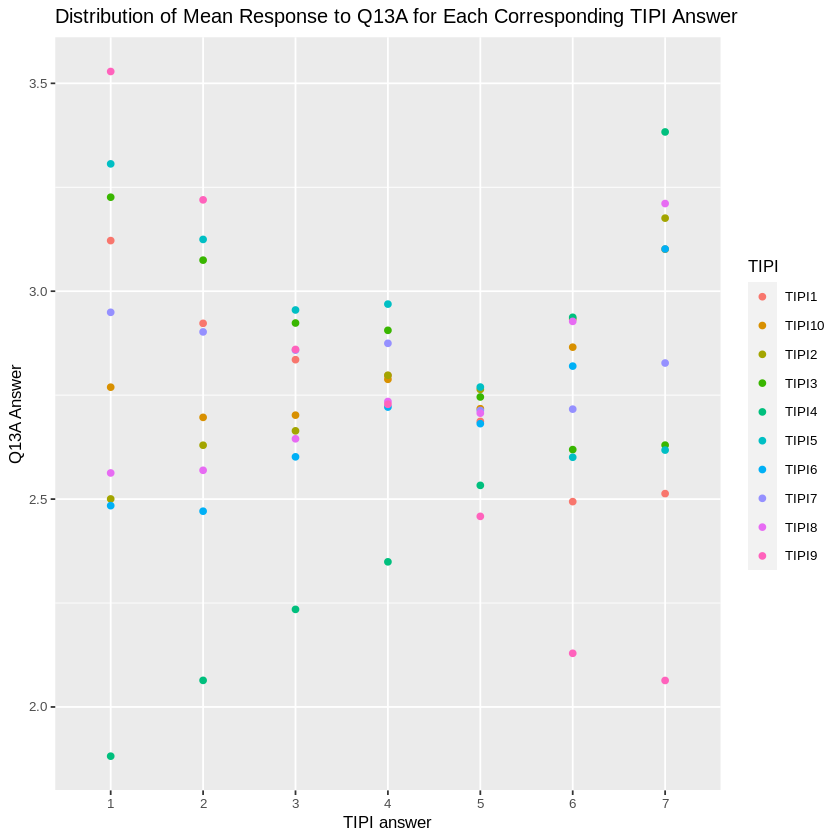

In [66]:
TIPI_dist <- ggplot(summary_table, aes(x = TIPI_answer, y = m_Q13A)) + 
                        geom_point(aes(colour = TIPI)) +
                        labs(y = "Q13A Answer") +
                        scale_x_discrete(name ="TIPI answer", limits=c("1","2","3","4","5","6","7")) +
                        theme(text = element_text(size = 10)) +
                        ggtitle("Distribution of Mean Response to Q13A for Each Corresponding TIPI Answer")

TIPI_dist

From this plot, we can see that each TIPI has a positive or negative correlation. For example the answers to TIPI9 show a strong correlation to the response to Q13A.

We can also create a box plot that shows the distribution of each TIPI question corresponds each distinct Q13A value.

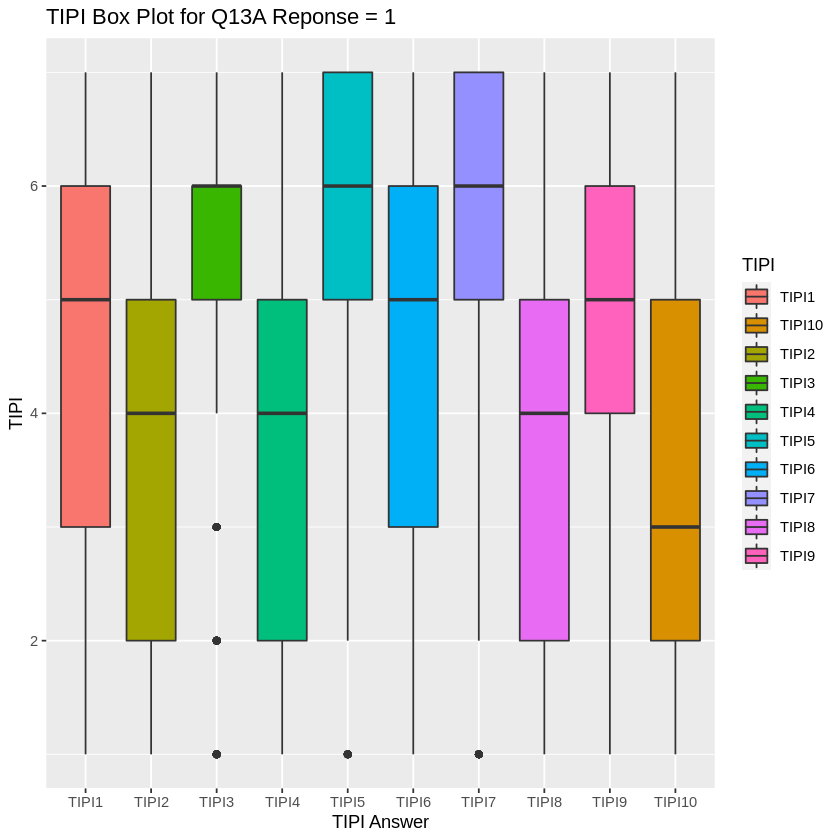

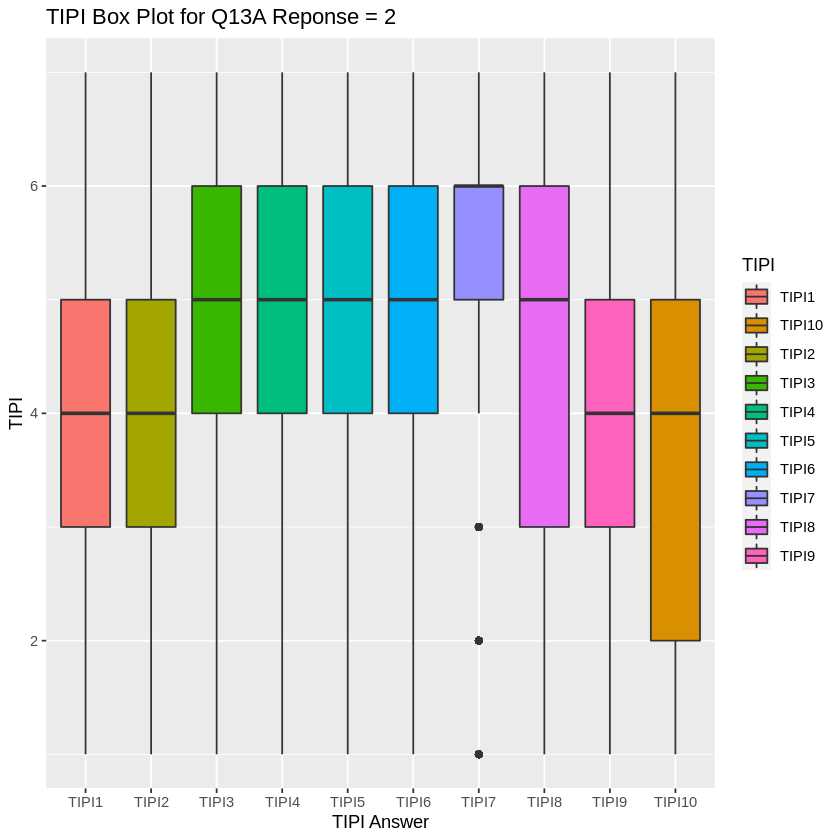

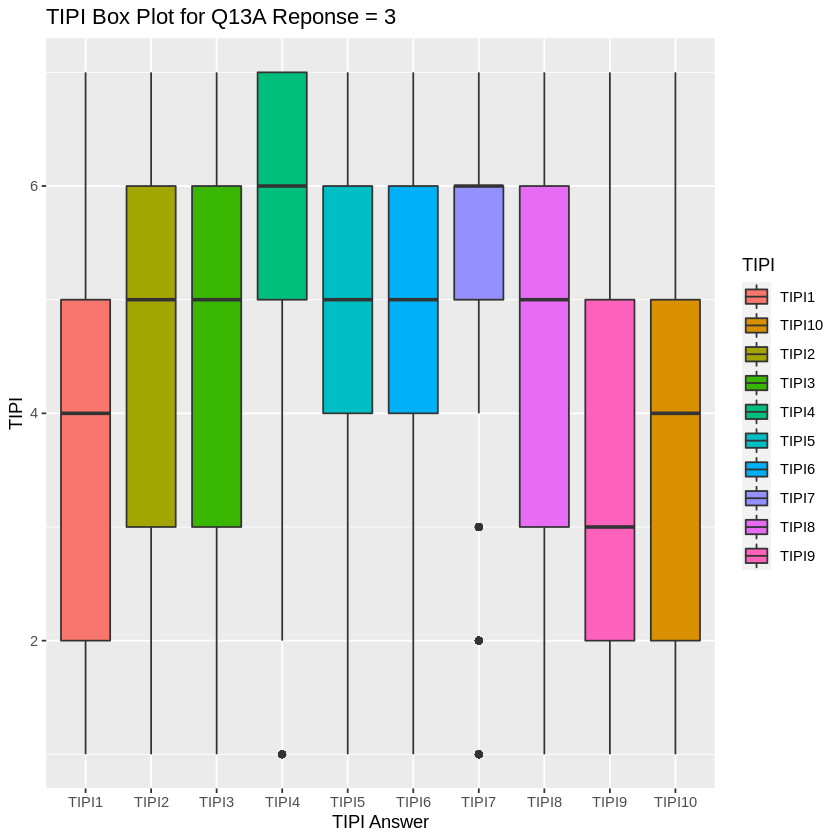

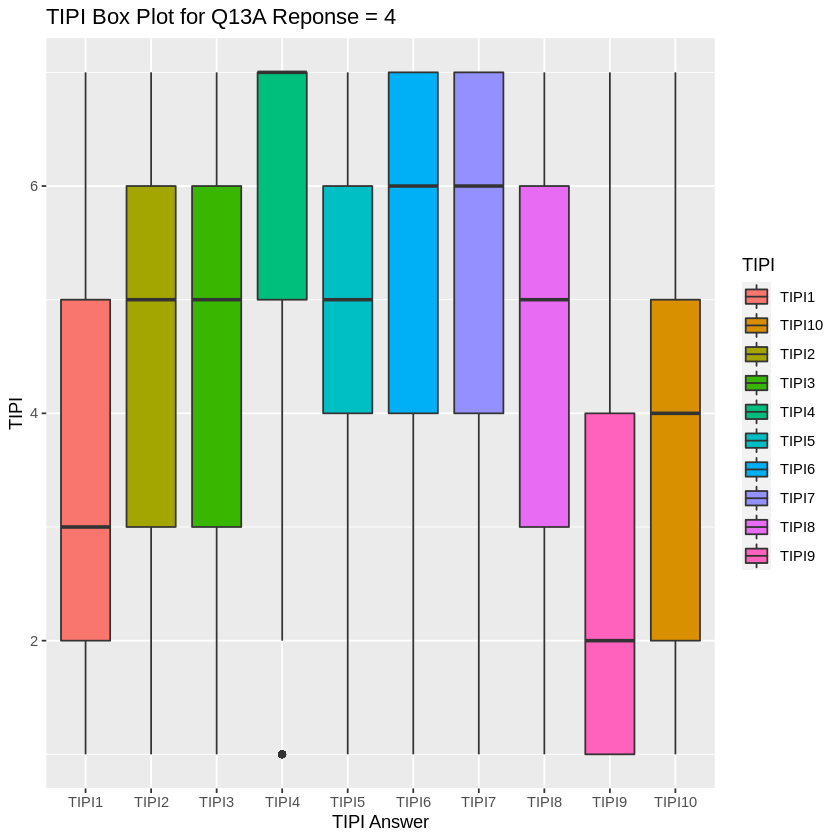

In [64]:
for (val in c(1,2,3,4)) {
    data <- dass_train_f_piv %>% filter(Q13A == val)
    level_order <- factor(data$TIPI, level = c("TIPI1", "TIPI2", "TIPI3", "TIPI4", "TIPI5", "TIPI6", "TIPI7", "TIPI8", "TIPI9", "TIPI10"))
    plot <- ggplot(data, aes(level_order, y=TIPI_answer, fill = TIPI)) + ggtitle(sprintf("TIPI Box Plot for Q13A Reponse = %s", val)) + geom_boxplot()+ xlab("TIPI Answer")+ ylab("TIPI")
    print(plot)
}




## Methods

The prediction target is column Q13A and the predictors are columns [TIPI1, TIPI10]. Since both the target and predictors are numerical data, our plan is to use linear regression to build a predictive model from this data. The demographic columns [education, major] may allow for further analysis of our model by targeting specific demographic characteristics.
Since we are building a linear regression model, the model can be visualized using multiple line plots, each representing the relationship between a predictor and the target. The demographic columns can be used to group data points into different colors to yield more insight into the model.


## Expected Outcomes and Significance 

From exploring this data set, we expect to find that one’s responses to the Ten Item Personality Inventory are able to predict the answer to Q13 “I felt sad and depressed”. We expect some items in the Personality Inventory to directly correlate with one’s feelings of sadness. For example, we expect answers to TIPI4 "Anxious, easily upset" to be positively correlated with Q13. We are also curious to see which unexpected items may be strong predictors to the answer of Q13 such as TIPI5 "Open to new experiences, complex". Our findings from this dataset may allow for better understanding and empathizing with mental health issues such as stress, anxiety, and depression. Future questions may include: What other predictors within this data set can accurately predict the outcome of Q13? Do the answers to items on the Ten Item Personality Inventory have the ability to predict the outcomes of any other questionnaire answers?